# MLP

In [1]:
import keras
from optimizers import StochasticGradientDescent
from layers import Dense,Dropout,Activation,BatchNormalization,Flatten
from neural_networks import NeuralNetwork
from losses import CrossEntropy
from sklearn import datasets
from metric import accuracy_score
from progress import to_categorical,train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test

In [3]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = load_dataset(flatten=True)

In [4]:
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

## 简单平凡网络结果

In [5]:
optimizer = StochasticGradientDescent()
n_samples, n_features = X_train.shape
n_hidden = 256


clf = NeuralNetwork(optimizer=optimizer,
                    loss=CrossEntropy,
                    validation_data=(X_test, y_test))

clf.add(Dense(n_hidden, input_shape=(n_features,)))
clf.add(Activation('relu'))
clf.add(Dense(n_hidden))
clf.add(Activation('relu'))
clf.add(Dense(10))
clf.add(Activation('softmax'))

In [6]:
train_err1, val_err1 = clf.fit(X_train, y_train, n_epochs=25, batch_size=32)

Training: 100% [------------------------------------------------] Time: 0:02:24


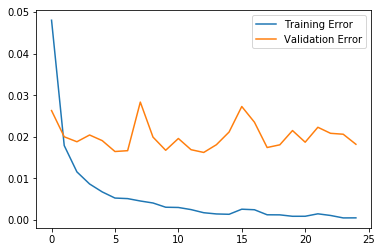

In [7]:
n = len(train_err1)
training, = plt.plot(range(n), train_err1, label="Training Error")
validation, = plt.plot(range(n), val_err1, label="Validation Error")
plt.legend(handles=[training, validation])

In [8]:
_,acc = clf.test_on_batch(X_test,y_test)
acc

0.98309999999999997

## 加入dropout后的效果

In [9]:
clf = NeuralNetwork(optimizer=optimizer,
                    loss=CrossEntropy,
                    validation_data=(X_test, y_test))

clf.add(Dense(n_hidden, input_shape=(n_features,)))
clf.add(Activation('relu'))
clf.add(Dropout(0.2))
clf.add(Dense(n_hidden))
clf.add(Activation('relu'))
clf.add(Dropout(0.5))
clf.add(Dense(10))
clf.add(Activation('softmax'))

In [10]:
train_err2, val_err2 = clf.fit(X_train, y_train, n_epochs=25, batch_size=32)

Training: 100% [------------------------------------------------] Time: 0:02:51


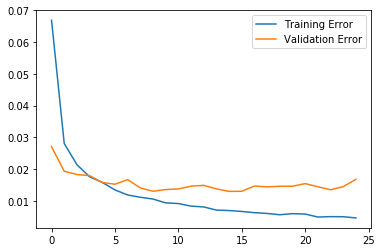

In [11]:
n = len(train_err2)
training, = plt.plot(range(n), train_err2, label="Training Error")
validation, = plt.plot(range(n), val_err2, label="Validation Error")
plt.legend(handles=[training, validation])

In [12]:
_,acc = clf.test_on_batch(X_test,y_test)
acc

0.9788

### 加入batchNormalization后的效果

In [13]:
clf = NeuralNetwork(optimizer=optimizer,
                    loss=CrossEntropy,
                    validation_data=(X_test, y_test))

clf.add(Dense(n_hidden, input_shape=(n_features,)))
clf.add(Activation('relu'))
clf.add(Dropout(0.2))
clf.add(BatchNormalization())
clf.add(Dense(n_hidden))
clf.add(Activation('relu'))
clf.add(BatchNormalization())
clf.add(Dropout(0.5))
clf.add(Dense(10))
clf.add(Activation('softmax'))

In [14]:
train_err3, val_err3 = clf.fit(X_train, y_train, n_epochs=25, batch_size=32)

Training: 100% [------------------------------------------------] Time: 0:03:26


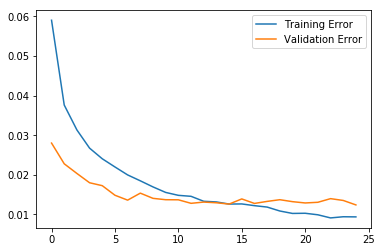

In [15]:
n = len(train_err3)
training, = plt.plot(range(n), train_err3, label="Training Error")
validation, = plt.plot(range(n), val_err3, label="Validation Error")
plt.legend(handles=[training, validation])

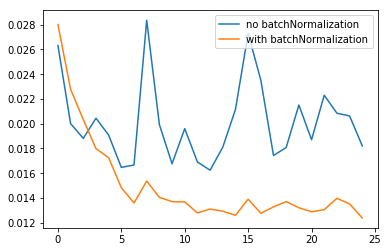

In [16]:
no_batchNormalization, =plt.plot(val_err1,label="no batchNormalization")
with_batchNormalization,=plt.plot(val_err3,label="with batchNormalization")
plt.legend(handles=[no_batchNormalization, with_batchNormalization])